# Imports

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
dataset = pd.read_csv('Iris.csv')

In [6]:
dataset[:5]

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,NaN,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
dataset.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,149.000000,148.000000,145.000000,150.000000
mean,75.500000,5.842282,3.052027,3.737241,1.198667
std,43.445368,0.830758,0.436197,1.768786,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.300000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


# Data cleaning


### Identify missing values

In [8]:
dataset.isnull().sum()

Id               0
SepalLengthCm    1
SepalWidthCm     2
PetalLengthCm    5
PetalWidthCm     0
Species          0
dtype: int64

### visualize not availabe data in dataset


<Figure size 1000x600 with 0 Axes>

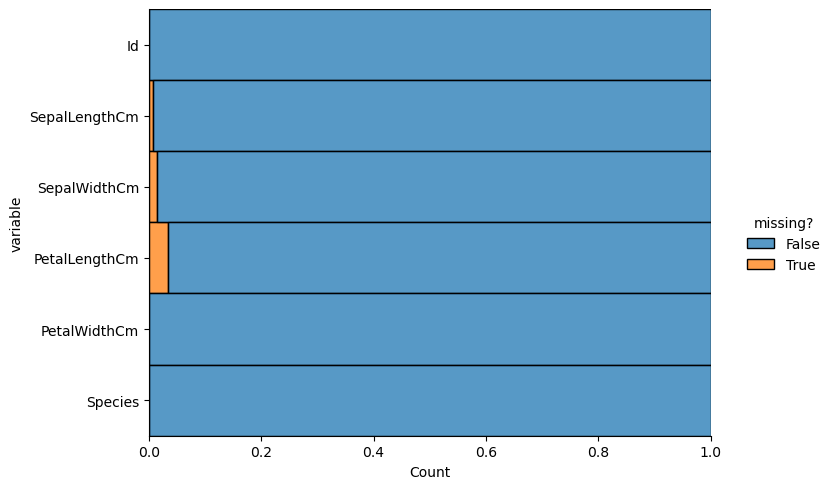

In [9]:
plt.figure(figsize=(10,6))
sns.displot(
    data = dataset.isna().melt(value_name='missing?'),
    y='variable',
    hue='missing?',
    multiple='fill',
    aspect=1.5
)

### Fill missing values by mean, median, std_deviation and variance

In [10]:
df = dataset

In [11]:
# mean
df['SepalLengthCm']=df['SepalLengthCm'].fillna(df['SepalLengthCm'].mean())

In [12]:
# median
df['SepalWidthCm']=df['SepalWidthCm'].fillna(df['SepalWidthCm'].median())

In [13]:
# Standard deviation
df['PetalLengthCm']=df['PetalLengthCm'].fillna(df['PetalLengthCm'].std())

In [14]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.400000,0.2,Iris-setosa
1,2,4.9,3.0,1.768786,0.2,Iris-setosa
2,3,4.7,3.2,1.300000,0.2,Iris-setosa
3,4,4.6,3.1,1.500000,0.2,Iris-setosa
4,5,5.0,3.6,1.400000,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.200000,2.3,Iris-virginica
146,147,6.3,2.5,5.000000,1.9,Iris-virginica
147,148,6.5,3.0,1.768786,2.0,Iris-virginica
148,149,6.2,3.4,5.400000,2.3,Iris-virginica


In [15]:
dataset.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# Data Integration

### Performing chi-sqaure test

In [16]:
np.random.seed(10)
alpha=10.8

In [17]:
movie_type=np.random.choice(
    a=['Ficiton','Non-Fiction'],
    p = [0.75,0.25],
    size=1000
)

In [18]:
cast_gender=np.random.choice(
    a=['male','female'],
    p = [0.40,0.60],
    size=1000
)

In [19]:
movies=pd.DataFrame({"types":movie_type,"gender":cast_gender})

In [20]:
movie=pd.crosstab(movies.types,movies.gender,margins=True)
movie.columns=["male","female","r_tot"]
movie.index=["fiction","non-fiction","c_tot"]
movie

,male,female,r_tot
fiction,446,299,745
non-fiction,157,98,255
c_tot,603,397,1000


In [21]:
observed = movie.iloc[0:2,0:2]
observed

,male,female
fiction,446,299
non-fiction,157,98


In [22]:
expected = np.outer(movie['r_tot'][0:2],movie.loc['c_tot'][0:2])/1000

In [23]:
expected = pd.DataFrame(expected)

In [24]:
expected.columns = ["male","female"]
expected.index = ["fiction","non-fiction"]
expected

,male,female
fiction,449.235,295.765
non-fiction,153.765,101.235


In [25]:
chi_square =(((observed-expected)**2)/expected).sum().sum()
chi_square

0.23011466562406513

### Finding Correlation and covarience between two attributes

In [26]:
def covariance(x,y):
    x_mean = sum(x)/float(len(x))
    y_mean = sum(y)/float(len(y))
    sub_x = [i-x_mean for i in x]
    sub_y = [i-y_mean for i in y]
    num = sum([sub_x[i]*sub_y[i] for i in range(len(x))])
    den=float(len(x)-1)
    con=num/den
    return con

In [27]:
cov = covariance(df['SepalLengthCm'],df['PetalLengthCm'])
cov

1.2118810690983244

In [28]:
def correlation(x,y,cov):
    cor=cov/(x.std()*y.std())
    return cor

In [29]:
corr = correlation(df['SepalLengthCm'],df['PetalLengthCm'],cov)
corr

0.824783193831964

# Data Reduction

### Demostrate feature subset selection using covariance analysis

In [30]:
x = df.iloc[:,:5]
target = df.iloc[:,5]

In [31]:
x.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.714894,-0.395930,0.828937,0.899759
SepalLengthCm,0.714894,1.000000,-0.113845,0.824783,0.817045
SepalWidthCm,-0.395930,-0.113845,1.000000,-0.394128,-0.360043
PetalLengthCm,0.828937,0.824783,-0.394128,1.000000,0.911096
PetalWidthCm,0.899759,0.817045,-0.360043,0.911096,1.000000


### Demostrate principal component analysis for reducing the dataset

In [32]:
def PCA(x,num):
    x_meaned = x - np.mean(x,axis=0)
    cov_mat = np.cov(x_meaned,rowvar=False)
    eigen_values,eigen_vectors = np.linalg.eigh(cov_mat)
    sorted_index = np.argsort(eigen_values)[::-1]
    sorted_eigenvalues = eigen_values[sorted_index]
    sorted_eigenvectors = eigen_vectors[:,sorted_index]
    eigenvector_subset = sorted_eigenvectors[:,0:num]
    X_reduced = np.dot(eigenvector_subset.transpose(),x_meaned.transpose()).transpose()
    
    return X_reduced

In [33]:
mat_reduced = PCA(x,2)
mat_reduced

array([[-7.45450574e+01,  3.67939214e-01],
       [-7.35341223e+01,  5.92386969e-01],
       [-7.25543056e+01,  5.27796579e-02],
       [-7.15493010e+01,  1.56153213e-01],
       [-7.05500094e+01,  1.70632853e-01],
       [-6.95332269e+01,  5.92011462e-01],
       [-6.85546869e+01, -3.47985689e-02],
       [-6.75482309e+01,  1.46824598e-01],
       [-6.65586155e+01, -2.01774089e-01],
       [-6.55515866e+01,  1.40107170e-02],
       [-6.45463621e+01,  1.76672518e-01],
       [-6.35507650e+01,  2.63936609e-03],
       [-6.25583360e+01, -2.29255682e-01],
       [-6.15761026e+01, -7.28989236e-01],
       [-6.05554485e+01, -1.00942982e-01],
       [-5.95458720e+01,  1.26019298e-01],
       [-5.85555553e+01, -1.96646270e-01],
       [-5.75570566e+01, -2.75616514e-01],
       [-5.65407093e+01,  1.77779414e-01],
       [-5.55564526e+01, -2.70979205e-01],
       [-5.45463948e+01, -2.97963266e-02],
       [-5.35560756e+01, -3.24740714e-01],
       [-5.25833782e+01, -1.04607673e+00],
       [-5.

In [34]:
principal_df = pd.DataFrame(mat_reduced, columns = ['PC1','PC2'])
principal_df

,PC1,PC2
0,-74.545057,0.367939
1,-73.534122,0.592387
2,-72.554306,0.052780
3,-71.549301,0.156153
4,-70.550009,0.170633
...,...,...
145,70.524716,-0.817010
146,71.507351,-1.267911
147,72.399491,-4.108106
148,73.520701,-0.956536


In [35]:
principal_df = pd.concat([principal_df,df['Species']],axis=1)
principal_df

,PC1,PC2,Species
0,-74.545057,0.367939,Iris-setosa
1,-73.534122,0.592387,Iris-setosa
2,-72.554306,0.052780,Iris-setosa
3,-71.549301,0.156153,Iris-setosa
4,-70.550009,0.170633,Iris-setosa
...,...,...,...
145,70.524716,-0.817010,Iris-virginica
146,71.507351,-1.267911,Iris-virginica
147,72.399491,-4.108106,Iris-virginica
148,73.520701,-0.956536,Iris-virginica


<Axes: xlabel='PC1', ylabel='PC2'>

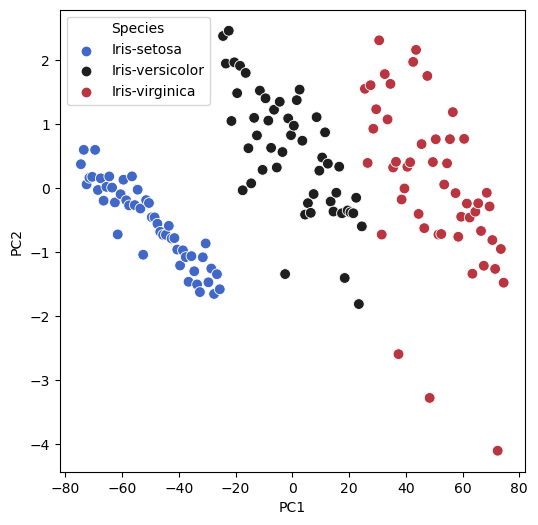

In [36]:
plt.figure(figsize=(6,6))
sns.scatterplot(data=principal_df,x='PC1',y='PC2',hue='Species',s=60,palette='icefire')

# Data Normalization

### Demonstrate min_max normalization

In [37]:
x.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.400000,0.2
1,2,4.9,3.0,1.768786,0.2
2,3,4.7,3.2,1.300000,0.2
3,4,4.6,3.1,1.500000,0.2
4,5,5.0,3.6,1.400000,0.2


In [38]:
def minmax_norm(df):
    for col in df.columns:
        df[col] = (df[col] - df[col].min())/(df[col].max()-df[col].min())
    return df

In [39]:
df_min_max_norm = minmax_norm(x)
df_min_max_norm

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,0.000000,0.222222,0.625000,0.067797,0.041667
1,0.006711,0.166667,0.416667,0.130303,0.041667
2,0.013423,0.111111,0.500000,0.050847,0.041667
3,0.020134,0.083333,0.458333,0.084746,0.041667
4,0.026846,0.194444,0.666667,0.067797,0.041667
...,...,...,...,...,...
145,0.973154,0.666667,0.416667,0.711864,0.916667
146,0.979866,0.555556,0.208333,0.677966,0.750000
147,0.986577,0.611111,0.416667,0.130303,0.791667
148,0.993289,0.527778,0.583333,0.745763,0.916667


#### Z_score Normalizaton

In [40]:
def z_score_norm(df):
    for col in df.columns:
        df[col]=(df[col]-df[col].mean())/df[col].std()
    return df

In [41]:
df_z_score_norm = z_score_norm(x)
df_z_score_norm

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-1.714797,-0.896513,1.035462,-1.280057,-1.308593
1,-1.691780,-1.138068,-0.118470,-1.072247,-1.308593
2,-1.668762,-1.379624,0.343102,-1.336406,-1.308593
3,-1.645745,-1.500402,0.112316,-1.223707,-1.308593
4,-1.622728,-1.017290,1.266248,-1.280057,-1.308593
...,...,...,...,...,...
145,1.622728,1.035934,-0.118470,0.861235,1.443121
146,1.645745,0.552822,-1.272402,0.748536,0.918985
147,1.668762,0.794378,-0.118470,-1.072247,1.050019
148,1.691780,0.432044,0.804675,0.973935,1.443121


#### Decimal Scale Normalization

In [44]:
def dec_scale(df):
    for x in df:
        p = df[x].max()
        q = len(str(abs(p)))
        df[x] = df[x]/10**q
    return df

In [51]:
df_dec_scaling = dec_scale(x)
df_dec_scaling

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-0.0,-0.0,0.0,-0.0,-0.0
1,-0.0,-0.0,-0.0,-0.0,-0.0
2,-0.0,-0.0,0.0,-0.0,-0.0
3,-0.0,-0.0,0.0,-0.0,-0.0
4,-0.0,-0.0,0.0,-0.0,-0.0
...,...,...,...,...,...
145,0.0,0.0,-0.0,0.0,0.0
146,0.0,0.0,-0.0,0.0,0.0
147,0.0,0.0,-0.0,-0.0,0.0
148,0.0,0.0,0.0,0.0,0.0


### Demonstrate linear regression

In [58]:
data = {"x":[14,-5,18,12,16],"y":[12,-12,14,-22,np.nan]}
dataset = pd.DataFrame(data)
dataset

,x,y
0,14,12.0
1,-5,-12.0
2,18,14.0
3,12,-22.0
4,16,NaN


In [64]:
def linear_regression(df):
    df = np.array(df)
    X = df[0:4,0]
    y = df[0:4,1]
    n = len(X)-1
    sum_x = np.sum(X)
    sum_y = np.sum(y)
    sum_x_squared = np.sum(X**2)
    sum_xy = np.sum(X * y)
    
    a = (n * sum_xy - sum_x * sum_y) / (n * sum_x_squared - sum_x**2)
    b = (sum_y - a * sum_x) / n
    
    return a,b


In [65]:
a,b = linear_regression(dataset)

In [66]:
d = np.array(dataset)
d1 = d[4,0]
y = a * d1 + b
y

2.6080586080586095

In [67]:
dataset.fillna(y)

,x,y
0,14,12.000000
1,-5,-12.000000
2,18,14.000000
3,12,-22.000000
4,16,2.608059


# -- END --